In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
from imblearn.over_sampling import RandomOverSampler
import sklearn
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('jeditversion.csv')
#data = shuffle(data)

In [4]:
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

(1749,)

In [5]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc       dit  noc       cbo       rfc      lcom        ca        ce  \
0  0.033898  0.000000  0.0  0.026012  0.083333  0.001462  0.010309  0.059406   
1  0.016949  0.142857  0.0  0.011561  0.038889  0.000000  0.003436  0.029703   
2  0.014528  0.000000  0.0  0.008671  0.020370  0.000216  0.003436  0.029703   
3  0.014528  0.142857  0.0  0.046243  0.025926  0.000072  0.027491  0.079208   
4  0.012107  0.142857  0.0  0.014451  0.040741  0.000000  0.003436  0.039604   

        npm     lcom3  ...  dam       moa       mfa       cam   ic   cbm  \
0  0.050459  0.384615  ...  1.0  0.058824  0.000000  0.294872  0.0  0.00   
1  0.000000  0.270833  ...  1.0  0.058824  0.538462  0.333333  0.2  0.12   
2  0.022936  0.300000  ...  1.0  0.176471  0.000000  0.333333  0.0  0.00   
3  0.022936  0.333333  ...  1.0  0.000000  0.782609  0.444444  0.0  0.00   
4  0.000000  0.062500  ...  1.0  0.000000  0.700000  0.350000  0.2  0.12   

        amc    max_cc    avg_cc  bug  
0  0.053968  0.047904  

Train on 979 samples, validate on 420 samples
Epoch 1/500
979/979 [==============================] - 6s 6ms/step - loss: 3.7397 - acc: 0.6343 - mean_squared_error: 3.3213 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.2891 - cosine_proximity: -1.2115 - val_loss: 3.4818 - val_acc: 0.8095 - val_mean_squared_error: 3.9669 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -1.2859
Epoch 2/500
979/979 [==============================] - 0s 281us/step - loss: 2.7308 - acc: 0.8202 - mean_squared_error: 3.3217 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8989 - cosine_proximity: -1.0318 - val_loss: 1.2583 - val_acc: 0.8095 - val_mean_squared_error: 3.9717 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3333 - val_cosine_proximity: -0.4039
Epoch 3/500
979/979 [==============================] - 0s 334us/step - loss: 0.9813 - acc: 0.8212 - mean_squared_e

979/979 [==============================] - 1s 647us/step - loss: 0.7233 - acc: 0.8212 - mean_squared_error: 3.3359 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.2503 - cosine_proximity: -0.2415 - val_loss: 0.7358 - val_acc: 0.8095 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2686
Epoch 21/500
979/979 [==============================] - 1s 530us/step - loss: 0.7187 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853193.9653 - cosine_proximity: -0.2424 - val_loss: 0.7370 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2700
Epoch 22/500
979/979 [==============================] - 1s 737us/step - loss: 0.7221 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_abso

979/979 [==============================] - 0s 303us/step - loss: 0.7100 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8294 - cosine_proximity: -0.2457 - val_loss: 0.7346 - val_acc: 0.8095 - val_mean_squared_error: 3.9819 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.0238 - val_cosine_proximity: -0.2678
Epoch 40/500
979/979 [==============================] - 0s 319us/step - loss: 0.7180 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.3473 - cosine_proximity: -0.2452 - val_loss: 0.7290 - val_acc: 0.8095 - val_mean_squared_error: 3.9809 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.6190 - val_cosine_proximity: -0.2891
Epoch 41/500
979/979 [==============================] - 0s 287us/step - loss: 0.7091 - acc: 0.8212 - mean_squared_error: 3.3356 - mean_absolute_error: 0.5298 - mean_abso

979/979 [==============================] - 0s 294us/step - loss: 0.6965 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8846 - cosine_proximity: -0.2625 - val_loss: 0.7278 - val_acc: 0.8095 - val_mean_squared_error: 3.9810 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2912
Epoch 59/500
979/979 [==============================] - 0s 352us/step - loss: 0.7040 - acc: 0.8212 - mean_squared_error: 3.3359 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.7732 - cosine_proximity: -0.2553 - val_loss: 0.7370 - val_acc: 0.8095 - val_mean_squared_error: 3.9821 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2612
Epoch 60/500
979/979 [==============================] - ETA: 0s - loss: 0.7032 - acc: 0.8200 - mean_squared_error: 3.3839 - mean_absolute_error: 0.5339 - mean_absolute_p

979/979 [==============================] - 0s 255us/step - loss: 0.6938 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853196.3105 - cosine_proximity: -0.2544 - val_loss: 0.7330 - val_acc: 0.8095 - val_mean_squared_error: 3.9806 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.9048 - val_cosine_proximity: -0.3006
Epoch 78/500
979/979 [==============================] - 0s 255us/step - loss: 0.6900 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.4648 - cosine_proximity: -0.2523 - val_loss: 0.7263 - val_acc: 0.8095 - val_mean_squared_error: 3.9815 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598363.7143 - val_cosine_proximity: -0.2836
Epoch 79/500
979/979 [==============================] - 0s 255us/step - loss: 0.6948 - acc: 0.8212 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_abso

979/979 [==============================] - 0s 239us/step - loss: 0.6925 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.0970 - cosine_proximity: -0.2509 - val_loss: 0.7469 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9762 - val_cosine_proximity: -0.2688
Epoch 97/500
979/979 [==============================] - 0s 239us/step - loss: 0.6956 - acc: 0.8212 - mean_squared_error: 3.3360 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1389 - cosine_proximity: -0.2543 - val_loss: 0.7402 - val_acc: 0.8095 - val_mean_squared_error: 3.9818 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -0.2673
Epoch 98/500
979/979 [==============================] - 0s 255us/step - loss: 0.6850 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.5298 - mean_abso

979/979 [==============================] - 0s 393us/step - loss: 0.6823 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9704 - cosine_proximity: -0.2592 - val_loss: 0.7377 - val_acc: 0.8095 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.9048 - val_cosine_proximity: -0.2753
Epoch 116/500
979/979 [==============================] - 0s 353us/step - loss: 0.6876 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1941 - cosine_proximity: -0.2541 - val_loss: 0.7416 - val_acc: 0.8095 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -0.2712
Epoch 117/500
979/979 [==============================] - 0s 374us/step - loss: 0.6877 - acc: 0.8212 - mean_squared_error: 3.3360 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 310us/step - loss: 0.6832 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1879 - cosine_proximity: -0.2570 - val_loss: 0.7443 - val_acc: 0.8095 - val_mean_squared_error: 3.9813 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2832
Epoch 135/500
979/979 [==============================] - 0s 250us/step - loss: 0.6800 - acc: 0.8212 - mean_squared_error: 3.3360 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.2339 - cosine_proximity: -0.2620 - val_loss: 0.7469 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2867
Epoch 136/500
979/979 [==============================] - 0s 269us/step - loss: 0.6806 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 287us/step - loss: 0.6621 - acc: 0.8212 - mean_squared_error: 3.3360 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.3585 - cosine_proximity: -0.2716 - val_loss: 0.7488 - val_acc: 0.8095 - val_mean_squared_error: 3.9825 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0952 - val_cosine_proximity: -0.2668
Epoch 154/500
979/979 [==============================] - 0s 266us/step - loss: 0.6660 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9949 - cosine_proximity: -0.2619 - val_loss: 0.7417 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.5476 - val_cosine_proximity: -0.2838
Epoch 155/500
979/979 [==============================] - 0s 480us/step - loss: 0.6720 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 255us/step - loss: 0.6526 - acc: 0.8212 - mean_squared_error: 3.3359 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.4270 - cosine_proximity: -0.2718 - val_loss: 0.7409 - val_acc: 0.8095 - val_mean_squared_error: 3.9825 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2693
Epoch 173/500
979/979 [==============================] - 0s 287us/step - loss: 0.6695 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.2809 - cosine_proximity: -0.2611 - val_loss: 0.7375 - val_acc: 0.8095 - val_mean_squared_error: 3.9810 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2976
Epoch 174/500
979/979 [==============================] - 0s 255us/step - loss: 0.6672 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_ab

Epoch 191/500
979/979 [==============================] - 0s 255us/step - loss: 0.6874 - acc: 0.8212 - mean_squared_error: 3.3358 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.5189 - cosine_proximity: -0.2580 - val_loss: 0.7435 - val_acc: 0.8095 - val_mean_squared_error: 3.9813 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2884
Epoch 192/500
979/979 [==============================] - 0s 287us/step - loss: 0.6623 - acc: 0.8212 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.3013 - cosine_proximity: -0.2576 - val_loss: 0.7460 - val_acc: 0.8095 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2846
Epoch 193/500
979/979 [==============================] - 0s 351us/step - loss: 0.6605 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.

979/979 [==============================] - 0s 283us/step - loss: 0.6509 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.4791 - cosine_proximity: -0.2659 - val_loss: 0.7451 - val_acc: 0.8095 - val_mean_squared_error: 3.9819 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.3571 - val_cosine_proximity: -0.2823
Epoch 211/500
979/979 [==============================] - 0s 331us/step - loss: 0.6491 - acc: 0.8212 - mean_squared_error: 3.3359 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.4270 - cosine_proximity: -0.2730 - val_loss: 0.7684 - val_acc: 0.8095 - val_mean_squared_error: 3.9832 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2576
Epoch 212/500
979/979 [==============================] - 0s 325us/step - loss: 0.6502 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 319us/step - loss: 0.6474 - acc: 0.8212 - mean_squared_error: 3.3359 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.5107 - cosine_proximity: -0.2767 - val_loss: 0.7570 - val_acc: 0.8095 - val_mean_squared_error: 3.9818 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.2381 - val_cosine_proximity: -0.2812
Epoch 230/500
979/979 [==============================] - 0s 271us/step - loss: 0.6447 - acc: 0.8212 - mean_squared_error: 3.3368 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.5720 - cosine_proximity: -0.2543 - val_loss: 0.7580 - val_acc: 0.8095 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2825
Epoch 231/500
979/979 [==============================] - 0s 335us/step - loss: 0.6412 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 315us/step - loss: 0.6372 - acc: 0.8212 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.6946 - cosine_proximity: -0.2713 - val_loss: 0.7495 - val_acc: 0.8095 - val_mean_squared_error: 3.9824 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.6667 - val_cosine_proximity: -0.2660
Epoch 249/500
979/979 [==============================] - 0s 257us/step - loss: 0.6613 - acc: 0.8212 - mean_squared_error: 3.3372 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8274 - cosine_proximity: -0.2484 - val_loss: 0.7417 - val_acc: 0.8095 - val_mean_squared_error: 3.9802 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.3089
Epoch 250/500
979/979 [==============================] - 0s 276us/step - loss: 0.6651 - acc: 0.8212 - mean_squared_error: 3.3356 - mean_absolute_error: 0.5298 - mean_ab

Epoch 267/500
979/979 [==============================] - 0s 400us/step - loss: 0.6566 - acc: 0.8212 - mean_squared_error: 3.3368 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1236 - cosine_proximity: -0.2670 - val_loss: 0.7572 - val_acc: 0.8095 - val_mean_squared_error: 3.9802 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.2143 - val_cosine_proximity: -0.3232
Epoch 268/500
979/979 [==============================] - 0s 335us/step - loss: 0.6337 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.2257 - cosine_proximity: -0.2693 - val_loss: 0.7487 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2859
Epoch 269/500
979/979 [==============================] - 0s 351us/step - loss: 0.6458 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.

979/979 [==============================] - 0s 378us/step - loss: 0.6250 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.4903 - cosine_proximity: -0.2684 - val_loss: 0.7540 - val_acc: 0.8095 - val_mean_squared_error: 3.9813 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.4762 - val_cosine_proximity: -0.2917
Epoch 287/500
979/979 [==============================] - 0s 353us/step - loss: 0.6432 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.7783 - cosine_proximity: -0.2620 - val_loss: 0.7466 - val_acc: 0.8095 - val_mean_squared_error: 3.9812 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2986
Epoch 288/500
979/979 [==============================] - 0s 335us/step - loss: 0.6394 - acc: 0.8212 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 306us/step - loss: 0.6132 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9438 - cosine_proximity: -0.2714 - val_loss: 0.7550 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.8333 - val_cosine_proximity: -0.2862
Epoch 306/500
979/979 [==============================] - 0s 317us/step - loss: 0.6363 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.0010 - cosine_proximity: -0.2613 - val_loss: 0.7491 - val_acc: 0.8095 - val_mean_squared_error: 3.9817 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2934
Epoch 307/500
979/979 [==============================] - 0s 306us/step - loss: 0.6245 - acc: 0.8223 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 0s 351us/step - loss: 0.6300 - acc: 0.8212 - mean_squared_error: 3.3370 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1430 - cosine_proximity: -0.2580 - val_loss: 0.7627 - val_acc: 0.8095 - val_mean_squared_error: 3.9814 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.5476 - val_cosine_proximity: -0.2859
Epoch 325/500
979/979 [==============================] - 0s 351us/step - loss: 0.6210 - acc: 0.8223 - mean_squared_error: 3.3361 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9295 - cosine_proximity: -0.2691 - val_loss: 0.7585 - val_acc: 0.8095 - val_mean_squared_error: 3.9819 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2864
Epoch 326/500
979/979 [==============================] - 0s 367us/step - loss: 0.6295 - acc: 0.8212 - mean_squared_error: 3.3367 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 542us/step - loss: 0.6394 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.3524 - cosine_proximity: -0.2700 - val_loss: 0.7689 - val_acc: 0.8095 - val_mean_squared_error: 3.9823 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0952 - val_cosine_proximity: -0.2760
Epoch 344/500
979/979 [==============================] - 1s 575us/step - loss: 0.6150 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.1307 - cosine_proximity: -0.2656 - val_loss: 0.7600 - val_acc: 0.8095 - val_mean_squared_error: 3.9818 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.4762 - val_cosine_proximity: -0.2927
Epoch 345/500
979/979 [==============================] - ETA: 0s - loss: 0.6367 - acc: 0.8247 - mean_squared_error: 3.6126 - mean_absolute_error: 0.5424 - mean_absolute

Epoch 362/500
979/979 [==============================] - 1s 587us/step - loss: 0.6012 - acc: 0.8212 - mean_squared_error: 3.3368 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8927 - cosine_proximity: -0.2743 - val_loss: 0.7734 - val_acc: 0.8071 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2934
Epoch 363/500
979/979 [==============================] - 1s 586us/step - loss: 0.6224 - acc: 0.8212 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.7886 - cosine_proximity: -0.2717 - val_loss: 0.7805 - val_acc: 0.8095 - val_mean_squared_error: 3.9823 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -0.2851
Epoch 364/500
979/979 [==============================] - 1s 931us/step - loss: 0.6156 - acc: 0.8223 - mean_squared_error: 3.3361 - mean_absolute_error: 0.

979/979 [==============================] - 0s 351us/step - loss: 0.6249 - acc: 0.8212 - mean_squared_error: 3.3367 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.0909 - cosine_proximity: -0.2603 - val_loss: 0.7789 - val_acc: 0.8095 - val_mean_squared_error: 3.9813 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -0.2980
Epoch 382/500
979/979 [==============================] - 0s 370us/step - loss: 0.6194 - acc: 0.8212 - mean_squared_error: 3.3362 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.6170 - cosine_proximity: -0.2762 - val_loss: 0.7750 - val_acc: 0.8095 - val_mean_squared_error: 3.9819 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2931
Epoch 383/500
979/979 [==============================] - 0s 425us/step - loss: 0.6155 - acc: 0.8212 - mean_squared_error: 3.3368 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 666us/step - loss: 0.6092 - acc: 0.8233 - mean_squared_error: 3.3363 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9316 - cosine_proximity: -0.2689 - val_loss: 0.7842 - val_acc: 0.8095 - val_mean_squared_error: 3.9822 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2806
Epoch 401/500
979/979 [==============================] - 1s 625us/step - loss: 0.6123 - acc: 0.8223 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.5291 - cosine_proximity: -0.2734 - val_loss: 0.7813 - val_acc: 0.8071 - val_mean_squared_error: 3.9820 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.4286 - val_cosine_proximity: -0.2932
Epoch 402/500
979/979 [==============================] - 1s 636us/step - loss: 0.6049 - acc: 0.8212 - mean_squared_error: 3.3370 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 964us/step - loss: 0.6135 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.6680 - cosine_proximity: -0.2684 - val_loss: 0.7813 - val_acc: 0.8095 - val_mean_squared_error: 3.9827 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.7143 - val_cosine_proximity: -0.2705
Epoch 420/500
979/979 [==============================] - 1s 873us/step - loss: 0.6123 - acc: 0.8212 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.7150 - cosine_proximity: -0.2645 - val_loss: 0.7969 - val_acc: 0.8000 - val_mean_squared_error: 3.9810 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2981
Epoch 421/500
979/979 [==============================] - 1s 547us/step - loss: 0.6249 - acc: 0.8212 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 610us/step - loss: 0.6071 - acc: 0.8212 - mean_squared_error: 3.3367 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853195.4423 - cosine_proximity: -0.2715 - val_loss: 0.8050 - val_acc: 0.8095 - val_mean_squared_error: 3.9820 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2827
Epoch 439/500
979/979 [==============================] - 1s 572us/step - loss: 0.6054 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.6129 - cosine_proximity: -0.2725 - val_loss: 0.8078 - val_acc: 0.8095 - val_mean_squared_error: 3.9822 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2782
Epoch 440/500
979/979 [==============================] - 1s 618us/step - loss: 0.6005 - acc: 0.8212 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 644us/step - loss: 0.6037 - acc: 0.8233 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.4719 - cosine_proximity: -0.2723 - val_loss: 0.8132 - val_acc: 0.8095 - val_mean_squared_error: 3.9826 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.3095 - val_cosine_proximity: -0.2735
Epoch 458/500
979/979 [==============================] - 1s 583us/step - loss: 0.6083 - acc: 0.8223 - mean_squared_error: 3.3368 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9775 - cosine_proximity: -0.2634 - val_loss: 0.7929 - val_acc: 0.8071 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.0714 - val_cosine_proximity: -0.2947
Epoch 459/500
979/979 [==============================] - 1s 549us/step - loss: 0.6070 - acc: 0.8202 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 616us/step - loss: 0.5977 - acc: 0.8202 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8539 - cosine_proximity: -0.2805 - val_loss: 0.8125 - val_acc: 0.8071 - val_mean_squared_error: 3.9823 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2816
Epoch 477/500
979/979 [==============================] - 1s 576us/step - loss: 0.5999 - acc: 0.8223 - mean_squared_error: 3.3365 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9111 - cosine_proximity: -0.2711 - val_loss: 0.8096 - val_acc: 0.8095 - val_mean_squared_error: 3.9822 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.5476 - val_cosine_proximity: -0.2791
Epoch 478/500
979/979 [==============================] - 1s 590us/step - loss: 0.6060 - acc: 0.8223 - mean_squared_error: 3.3367 - mean_absolute_error: 0.5298 - mean_ab

979/979 [==============================] - 1s 840us/step - loss: 0.6149 - acc: 0.8202 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.8662 - cosine_proximity: -0.2730 - val_loss: 0.8229 - val_acc: 0.8024 - val_mean_squared_error: 3.9821 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598362.1905 - val_cosine_proximity: -0.2768
Epoch 496/500
979/979 [==============================] - 1s 877us/step - loss: 0.5968 - acc: 0.8202 - mean_squared_error: 3.3364 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 17853194.9949 - cosine_proximity: -0.2722 - val_loss: 0.7975 - val_acc: 0.7976 - val_mean_squared_error: 3.9816 - val_mean_absolute_error: 0.5658 - val_mean_absolute_percentage_error: 17598361.9524 - val_cosine_proximity: -0.2958
Epoch 497/500
979/979 [==============================] - 1s 871us/step - loss: 0.5997 - acc: 0.8243 - mean_squared_error: 3.3366 - mean_absolute_error: 0.5298 - mean_ab

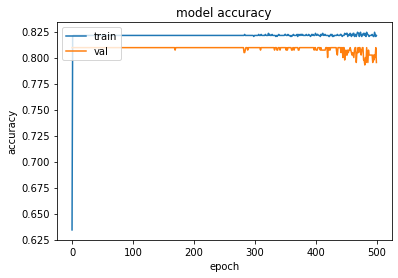

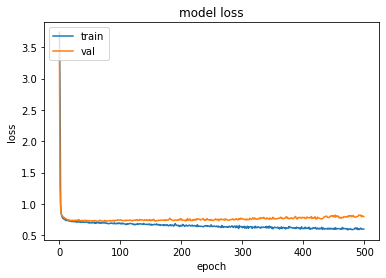

In [10]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(100, input_shape = (1,20), dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
model.add(LSTM(80, dropout = 0.2, return_sequences=True))
model.add(LSTM(60, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 500, batch_size = 50)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 100)            48400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 80)             57920     
_________________________________________________________________
lstm_9 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2806      
Total params: 142,966
Trainable params: 142,966
Non-trainable params: 0
_________________________________________________________________
